In [1]:
import os
import csv 
import numpy as np
import pandas as pd
import random
import math
import ast
import re
import regex
import string
from functools import reduce
import operator  
import warnings

from collections import OrderedDict
from collections import defaultdict
from datetime import datetime
from datetime import date
from ast import literal_eval

import urllib
import requests
import json
import shutil
import time
import fnmatch
from pathlib import Path

from requests_html import AsyncHTMLSession
from urllib.parse import urlparse
from requests_html import HTMLSession

#import PyPaperBot
import nltk
#import fitz
from nltk.corpus import stopwords


#from scidownl import scihub_download
import pickle
from text_preprocessing import preprocess_text
from text_preprocessing import *
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sentence_transformers import util

import torch
from transformers import AutoTokenizer, AutoModel

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import ttest_1samp
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from scipy.stats import shapiro
from scipy.stats import normaltest

import pylab 

#from requests_html import HTMLSession

# import nest_asyncio
# nest_asyncio.apply()

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# %matplotlib notebook


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/psych256lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# data collection 

In [ ]:
# copy codes from other files 

# read processed csv files: abstract, title, whole pdf 

In [2]:
columns = ['url', 'USApolicyCitation','mean_tfidf_sim', 
       'mean_bert_large_uncased_sim', 'mean_all_distilroberta_v1_sim',
       'mean_all_mpnet_base_v2_sim', 'mean_all_MiniLM_L6_v2_sim',
       'mean_sentence_t5_xl_sim', 'mean_political_bert_sim',
       'mean_legal_bert_sim', 'mean_specter_sim', 'mean_scibert_sim',
       'mean_clinical_bert_sim', 'mean_biobert_base_cased_v12_sim']

In [21]:
# abstract-fulltext 
abstract_to_fulltext_file = pd.read_csv("/home/psych256lab/Documents/Mokarrama/Thesis/file_with_all_mean_abst_sim_scores.csv", usecols =columns, encoding ='utf-8')

# title-title 
title_to_title_file = pd.read_csv("/home/psych256lab/Documents/Mokarrama/Thesis/TitleFiles/Final files/file_with_all_mean_ttl_sim_scores.csv", usecols =columns, encoding ='utf-8')

# fulltext-fulltext
fulltext_to_fulltext_file = pd.read_csv("/home/psych256lab/Documents/Mokarrama/Thesis/Final files/new/finalFile_with_meanSimScores.csv", usecols =columns, encoding ='utf-8')


In [22]:
abstract_to_fulltext_file.info()
title_to_title_file.info()
fulltext_to_fulltext_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url                              2301 non-null   object 
 1   USApolicyCitation                2301 non-null   int64  
 2   mean_tfidf_sim                   2008 non-null   float64
 3   mean_bert_large_uncased_sim      2010 non-null   float64
 4   mean_all_distilroberta_v1_sim    2010 non-null   float64
 5   mean_all_mpnet_base_v2_sim       2010 non-null   float64
 6   mean_all_MiniLM_L6_v2_sim        2010 non-null   float64
 7   mean_sentence_t5_xl_sim          2010 non-null   float64
 8   mean_political_bert_sim          2010 non-null   float64
 9   mean_legal_bert_sim              2010 non-null   float64
 10  mean_specter_sim                 2010 non-null   float64
 11  mean_scibert_sim                 2010 non-null   float64
 12  mean_clinical_bert_s

In [23]:
abstract_to_fulltext_file.dropna(inplace = True)
title_to_title_file.dropna(inplace = True)
fulltext_to_fulltext_file.dropna(inplace = True)

In [24]:
abstract_to_fulltext_file.info()
title_to_title_file.info()
fulltext_to_fulltext_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2300
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url                              2008 non-null   object 
 1   USApolicyCitation                2008 non-null   int64  
 2   mean_tfidf_sim                   2008 non-null   float64
 3   mean_bert_large_uncased_sim      2008 non-null   float64
 4   mean_all_distilroberta_v1_sim    2008 non-null   float64
 5   mean_all_mpnet_base_v2_sim       2008 non-null   float64
 6   mean_all_MiniLM_L6_v2_sim        2008 non-null   float64
 7   mean_sentence_t5_xl_sim          2008 non-null   float64
 8   mean_political_bert_sim          2008 non-null   float64
 9   mean_legal_bert_sim              2008 non-null   float64
 10  mean_specter_sim                 2008 non-null   float64
 11  mean_scibert_sim                 2008 non-null   float64
 12  mean_clinical_bert_s

In [25]:
abstract_to_fulltext_file.describe()

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_legal_bert_sim,mean_specter_sim,mean_scibert_sim,mean_clinical_bert_sim,mean_biobert_base_cased_v12_sim
count,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.816235,0.199558,0.658780,0.179518,0.210422,0.168215,0.645989,0.626816,0.747988,0.675297,0.617073,0.799589,0.798632
std,2.430826,0.133075,0.034121,0.043795,0.050378,0.045899,0.019422,0.050729,0.045357,0.035809,0.065386,0.031507,0.041861
min,1.000000,0.000000,0.483000,0.021000,0.031000,0.007000,0.579000,0.356000,0.485000,0.496000,0.213000,0.580000,0.424000
25%,1.000000,0.100000,0.637000,0.154000,0.179000,0.139000,0.633000,0.595000,0.721000,0.653000,0.601000,0.784000,0.779000
50%,2.000000,0.177000,0.658000,0.178000,0.210000,0.166000,0.644000,0.627000,0.748000,0.677000,0.628000,0.801000,0.801000
75%,4.000000,0.274000,0.681000,0.205000,0.241000,0.194000,0.656000,0.662000,0.779000,0.700000,0.655000,0.820000,0.826000
max,10.000000,0.726000,0.784000,0.381000,0.443000,0.432000,0.740000,0.790000,0.864000,0.825000,0.750000,0.877000,0.900000


In [26]:
title_to_title_file.describe()

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_political_bert_sim,mean_legal_bert_sim,mean_specter_sim,mean_scibert_sim,mean_clinical_bert_sim,mean_biobert_base_cased_v12_sim,mean_sentence_t5_xl_sim
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,2.848677,0.098656,0.768618,0.421215,0.480022,0.429804,0.772609,0.852690,0.759965,0.710537,0.883048,0.891962,0.732033
std,2.442859,0.162713,0.072057,0.192779,0.201316,0.206823,0.079180,0.048322,0.092898,0.064673,0.042922,0.041375,0.067005
min,1.000000,0.000000,0.480000,-0.088000,-0.063000,-0.079000,0.334000,0.463000,0.449000,0.468000,0.607000,0.548000,0.521000
25%,1.000000,0.000000,0.725000,0.292000,0.350250,0.289000,0.729250,0.826250,0.697000,0.668000,0.859000,0.872000,0.686000
50%,2.000000,0.021500,0.779000,0.427000,0.494000,0.435500,0.786000,0.860000,0.766000,0.716000,0.891000,0.901000,0.732000
75%,4.000000,0.137750,0.821000,0.550000,0.621000,0.571000,0.827000,0.886000,0.826000,0.757000,0.913000,0.920000,0.776000
max,10.000000,1.000000,0.960000,0.978000,0.988000,0.993000,0.969000,0.975000,0.989000,0.916000,0.980000,0.984000,0.971000


In [27]:
fulltext_to_fulltext_file.describe()

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_base_cased_v12_sim
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.00000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,2.817544,0.432771,0.613628,0.168631,0.175789,0.144646,0.641857,0.59310,0.681490,0.788264,0.710518,0.612862,0.788014
std,2.406305,0.170971,0.023495,0.026731,0.029965,0.025765,0.010155,0.02935,0.025759,0.018662,0.029745,0.024981,0.021555
min,1.000000,0.001000,0.526000,0.017000,0.049000,0.002000,0.593000,0.45600,0.587000,0.612000,0.581000,0.300000,0.626000
25%,1.000000,0.314000,0.598000,0.153000,0.158000,0.128000,0.636000,0.57500,0.665750,0.776000,0.691000,0.596000,0.774000
50%,2.000000,0.420000,0.613000,0.170000,0.176000,0.144000,0.642000,0.59200,0.683000,0.788000,0.710000,0.610000,0.787000
75%,4.000000,0.527000,0.628000,0.184000,0.193000,0.160000,0.648000,0.61000,0.699000,0.800000,0.730000,0.628000,0.802000
max,10.000000,1.000000,0.712000,0.288000,0.302000,0.253000,0.684000,0.71700,0.767000,0.849000,0.817000,0.715000,0.858000


## Data Distribution Plots and Analysis

In [8]:
len(columns)

14

In [ ]:
# Draw q-q plot 
def qqplot(df: pd.core.frame.DataFrame): 
    # plt.style.use('seaborn')
    sns.set(style="whitegrid")  
    fig, ax = plt.subplots(6, 2, figsize=(10, 15))
    colors = ["skyblue","olive","gold","teal", "teal","blue","purple","gold","olive","skyblue","blue","purple" ]

    i=l=0
    for k in range(2,len(columns),2):
        stats.probplot(df[columns[k]], dist ='norm', plot=ax[l,0], fit=True)
        stats.probplot(df[columns[k+1]], plot=ax[l,1], fit=True)
        # Change colour of scatter
        ax[l,0].get_lines()[0].set_markerfacecolor(colors[i])
        ax[l,1].get_lines()[0].set_markerfacecolor(colors[i+1])
        ax[l,0].set_title(f"Q-Q Plot ({columns[k]})")
        ax[l,1].set_title(f"Q-Q Plot ({columns[k+1]})")
        
        l=l+1
        i=i+2
    fig.tight_layout()
    fig.savefig("sim_scores_distribution_qq.png")
    
    return None

def qqplot1(df1: pd.core.frame.DataFrame, df2: pd.core.frame.DataFrame, df3: pd.core.frame.DataFrame): 
    # plt.style.use('seaborn')
    sns.set(style="whitegrid")  
    fig, ax = plt.subplots(12, 3, figsize=(15, 28))
    colors = ["skyblue","olive","gold","teal", "teal","blue","purple","gold","olive","skyblue","blue","purple" ]

    l=0
    for k in range(2,len(columns)):
        stats.probplot(df1[columns[k]], plot=ax[l,0], fit=True) #dist ='norm',
        stats.probplot(df2[columns[k]], plot=ax[l,1], fit=True)
        stats.probplot(df3[columns[k]], plot=ax[l,2], fit=True)
        # Change colour of scatter
        ax[l,0].get_lines()[0].set_markerfacecolor(colors[0])
        ax[l,1].get_lines()[0].set_markerfacecolor(colors[1])
        ax[l,2].get_lines()[0].set_markerfacecolor(colors[2])
        ax[l,0].set_title(f"Q-Q Plot: Title-to-Title ({columns[k]})")
        ax[l,1].set_title(f"Q-Q Plot: Abstract-to-Fulltext {columns[k]})")
        ax[l,2].set_title(f"Q-Q Plot: Fulltext-to-Fulltext ({columns[k]})")
        
        l=l+1
    fig.tight_layout()
    fig.savefig("sim_scores_distribution_qq_comp.png")
    
    return None



In [25]:
def histogram(df: pd.core.frame.DataFrame):
    # import seaborn as sns
    sns.set(style="whitegrid")  
    fig,axs = plt.subplots(6,2, figsize = (10,15))
    
    colors = ["skyblue","olive","gold","teal", "teal","blue","purple","gold","olive","skyblue","blue","purple" ]
    l=i=0
    # i=7 # first index of the models in consideration in mean_sim_file_columns
    for k in range(2,len(columns),2): # when tf-idf is included-> range(0,len(colors),2) and add one new color in colors
        sns.histplot(data=df, x=columns[k], kde=True, color=colors[i], ax=axs[l, 0])
        sns.histplot(data=df, x=columns[k+1], kde=True, color=colors[i+1], ax=axs[l, 1])
        l=l+1
        i=i+2
    fig.tight_layout()
    fig.savefig("sim_scores_distribution_hist.png")
    return None

In [73]:
# import seaborn as sns
def boxPlot(df: pd.core.frame.DataFrame ):
    # sns.set(style="whitegrid")  
    fig,axs = plt.subplots(6,2, figsize = (10,15))
    colors = ["skyblue","olive","gold","teal", "teal","blue","purple","gold","olive","skyblue","blue" ,"purple" ]
    i=l=0
     # first index of the models in consideration in mean_sim_file_columns
    for k in range(2,len(columns),2): # when tf-idf is included-> range(0,len(colors),2) and add one new color in colors
        sns.boxplot(data=df, x=columns[k], color=colors[i], ax=axs[l, 0])
        sns.boxplot(data=df, x=columns[k+1],color=colors[i+1], ax=axs[l, 1])
        l=l+1
        i=i+2
    fig.tight_layout()
    fig.savefig("sim_scores_distribution_box.png")
    return None

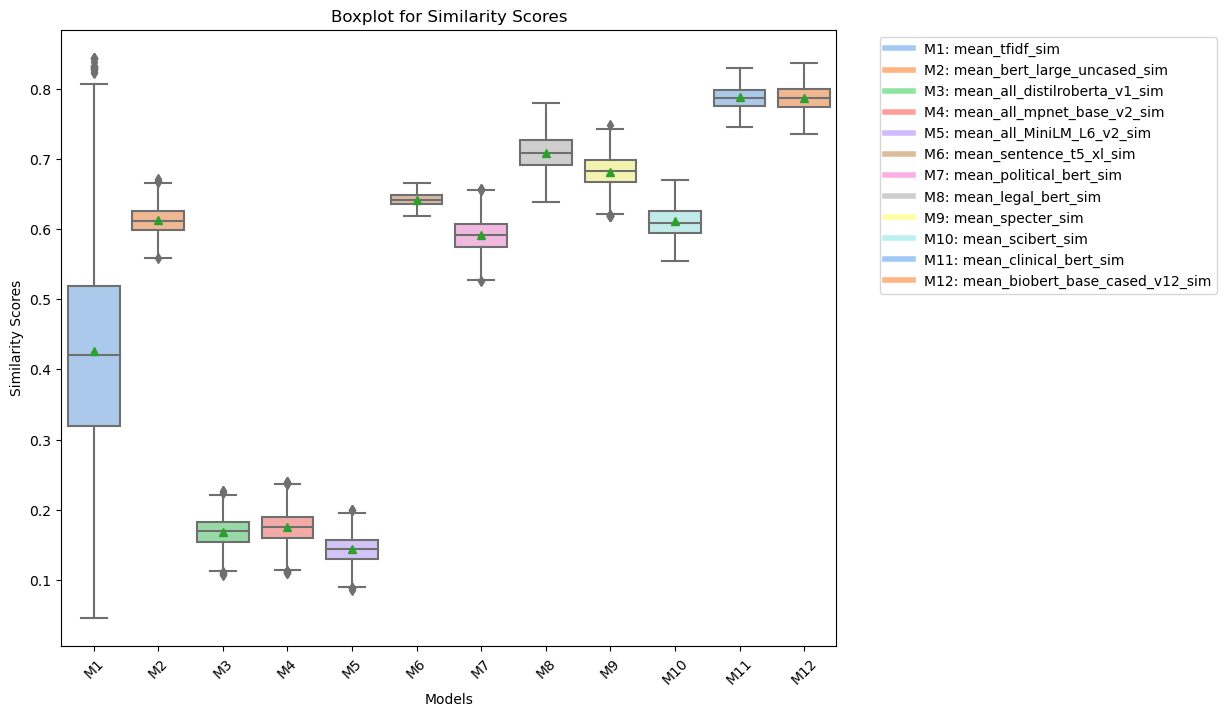

In [75]:
# title_to_title_file #,abstract_to_fulltext_file,fulltext_to_text_file) # filtered_fulltext_to_fulltext_file
# Create a sample DataFrame
data = filtered_fulltext_to_fulltext_file[columns[2:]]
# Create a boxplot for multiple columns with custom colors
# colors = ['blue', 'green', 'red']  # Custom colors for the columns
# colors = ["skyblue","olive","gold","teal", "teal","blue","purple","gold","olive","skyblue","blue" ,"purple" ]
plt.figure(figsize=(10,8))
colors = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0','#a1c9f4', '#ffb482']
up_collab = ['M1', 'M2', 'M3','M4', 'M5', 'M6', 'M7','M8', 'M9', 'M10', 'M11','M12']

ax = sns.boxplot(data=data, orient='v', showmeans = True, palette=colors) 
# Set custom x-axis tick labels
column_labels = columns[2:] #['Column1', 'Column2', 'Column3']
numeric_values = [1, 2, 3]  # Numeric values for the tick labels
# ax.set_xticks(range(len(column_labels)))
ax.set_xticklabels(up_collab, rotation=45)
# Set axis labels and title
plt.xlabel('Models')
plt.ylabel('Similarity Scores') 
plt.title('Boxplot for Similarity Scores: Case 3 (without outliers)')
# plt.title('Boxplot for Similarity Scores')
# Create a custom legend with matching colors and move it to the upper right
legend_labels = [f'M{i+1}: {col}' for i,col in enumerate(column_labels)]
legend_colors = colors
legend_handles = [plt.Line2D([0], [0], color=col, lw=4) for col in legend_colors]
plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('bx_case3.png', bbox_inches = 'tight')
plt.show()

In [ ]:
qqplot(title_to_title_file) #,abstract_to_fulltext_file,fulltext_to_fulltext_file)

In [147]:
# qqplot1(title_to_title_file,abstract_to_fulltext_file,fulltext_to_fulltext_file)

### separate plots for each category

In [ ]:
# before removing outliers
print(" Title-to-Title Similarity Scores: \n")
qqplot(title_to_title_file)

In [ ]:
print("\n abstract-to-fulltext Similarity Scores: \n")
qqplot(abstract_to_fulltext_file)

In [ ]:
print("\n fulltext-to-fulltext Similarity Scores: \n")
qqplot(fulltext_to_text_file)

In [175]:
# histogram(abstract_to_fulltext_file)

In [174]:
# boxPlot(abstract_to_fulltext_file)

### Remove Outliers

In [47]:
def removeOutliers(df: pd.core.frame.DataFrame, col:str):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]
    return None

In [11]:
print(sns.color_palette('pastel').as_hex())
# p

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [48]:
def getOutliersRemoved(df: pd.core.frame.DataFrame):
    for i in columns[2:]:
    # print(i, df.columns[7])
        if i ==columns[2]:
            removeOutliers(df, i)
           
        else:
            removeOutliers(filtered_data, i)
# Assigning filtered data back to our original variable
    # data = filtered_data
    return filtered_data
    # print("Shape of data after outlier removal is: ", data.shape)

In [45]:
# rough work
# col='mean_tfidf_sim'
# Q3 = np.quantile(filtered_fulltext_to_fulltext_file[col], 0.75)
# Q1 = np.quantile(filtered_fulltext_to_fulltext_file[col], 0.25)
# IQR = Q3 - Q1
# lower_range = Q1 - 1.5 * IQR
# upper_range = Q3 + 1.5 * IQR
# print(Q1,Q3,IQR, lower_range, upper_range)

In [41]:
des = pd.DataFrame(filtered_fulltext_to_fulltext_file.describe())

In [44]:
type(des.T)

pandas.core.frame.DataFrame

In [49]:
filtered_title_to_title_file = getOutliersRemoved(title_to_title_file)
print("....................")
filtered_abstract_to_fulltext_file = getOutliersRemoved(abstract_to_fulltext_file)
print("....................")
filtered_fulltext_to_fulltext_file = getOutliersRemoved(fulltext_to_fulltext_file)

IQR value for column mean_tfidf_sim is: 0.13775
IQR value for column mean_bert_large_uncased_sim is: 0.09599999999999997
IQR value for column mean_all_distilroberta_v1_sim is: 0.24824999999999997
IQR value for column mean_all_mpnet_base_v2_sim is: 0.25350000000000006
IQR value for column mean_all_MiniLM_L6_v2_sim is: 0.26300000000000007
IQR value for column mean_sentence_t5_xl_sim is: 0.08224999999999993
IQR value for column mean_political_bert_sim is: 0.09399999999999997
IQR value for column mean_legal_bert_sim is: 0.05575000000000008
IQR value for column mean_specter_sim is: 0.118
IQR value for column mean_scibert_sim is: 0.08299999999999996
IQR value for column mean_clinical_bert_sim is: 0.049000000000000044
IQR value for column mean_biobert_base_cased_v12_sim is: 0.04200000000000004
....................
IQR value for column mean_tfidf_sim is: 0.17400000000000002
IQR value for column mean_bert_large_uncased_sim is: 0.04500000000000004
IQR value for column mean_all_distilroberta_v1_s

In [ ]:
# filtered_fulltext_to_fulltext_file

In [50]:
len(filtered_title_to_title_file), len(filtered_abstract_to_fulltext_file), len(filtered_fulltext_to_fulltext_file)

(1607, 1638, 1997)

In [16]:
datafull = filtered_fulltext_to_fulltext_file.describe()
datafull

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_base_cased_v12_sim
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,2.879319,0.426532,0.612405,0.168127,0.174987,0.143662,0.641800,0.591646,0.681686,0.787482,0.708995,0.611127,0.787087
std,2.429148,0.147037,0.019675,0.021325,0.023843,0.020521,0.008568,0.023972,0.023540,0.015376,0.025820,0.021026,0.017997
min,1.000000,0.046000,0.558000,0.107000,0.110000,0.086000,0.619000,0.526000,0.618000,0.745000,0.638000,0.555000,0.736000
25%,1.000000,0.319000,0.599000,0.154000,0.159000,0.130000,0.636000,0.575000,0.667000,0.776000,0.691000,0.595000,0.774000
50%,2.000000,0.420000,0.612000,0.170000,0.176000,0.144000,0.642000,0.591000,0.683000,0.787000,0.708000,0.609000,0.786000
75%,4.000000,0.519000,0.626000,0.182000,0.190000,0.157000,0.648000,0.607000,0.698000,0.798000,0.727000,0.626000,0.800000
max,10.000000,0.844000,0.671000,0.227000,0.240000,0.200000,0.665000,0.657000,0.748000,0.830000,0.780000,0.670000,0.837000


In [40]:
datafull.to_csv('t_t.csv')

In [35]:
datafull = filtered_abstract_to_fulltext_file.describe()
datafull

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_legal_bert_sim,mean_specter_sim,mean_scibert_sim,mean_clinical_bert_sim,mean_biobert_base_cased_v12_sim
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,2.855311,0.206103,0.660860,0.178521,0.208358,0.166971,0.642883,0.634098,0.754650,0.675106,0.634350,0.805051,0.806542
std,2.456053,0.112169,0.030219,0.035500,0.041063,0.036974,0.014938,0.041356,0.037199,0.031536,0.035345,0.022414,0.029097
min,1.000000,0.001000,0.570000,0.085000,0.098000,0.065000,0.602000,0.506000,0.649000,0.586000,0.533000,0.743000,0.726000
25%,1.000000,0.119000,0.640000,0.156000,0.180000,0.142000,0.633000,0.604000,0.730000,0.653000,0.612000,0.789250,0.786000
50%,2.000000,0.186000,0.659000,0.178000,0.208000,0.166000,0.642000,0.632000,0.752000,0.676000,0.633000,0.804000,0.805000
75%,4.000000,0.277000,0.682000,0.203000,0.236750,0.191750,0.653000,0.664000,0.781000,0.698000,0.657000,0.821000,0.827000
max,10.000000,0.531000,0.749000,0.277000,0.325000,0.269000,0.688000,0.757000,0.856000,0.764000,0.725000,0.867000,0.880000


In [36]:
datafull.to_csv("abs_full.csv")

In [37]:
datafull = filtered_fulltext_to_fulltext_file.describe()
datafull

,USApolicyCitation,mean_tfidf_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_base_cased_v12_sim
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,2.879319,0.426532,0.612405,0.168127,0.174987,0.143662,0.641800,0.591646,0.681686,0.787482,0.708995,0.611127,0.787087
std,2.429148,0.147037,0.019675,0.021325,0.023843,0.020521,0.008568,0.023972,0.023540,0.015376,0.025820,0.021026,0.017997
min,1.000000,0.046000,0.558000,0.107000,0.110000,0.086000,0.619000,0.526000,0.618000,0.745000,0.638000,0.555000,0.736000
25%,1.000000,0.319000,0.599000,0.154000,0.159000,0.130000,0.636000,0.575000,0.667000,0.776000,0.691000,0.595000,0.774000
50%,2.000000,0.420000,0.612000,0.170000,0.176000,0.144000,0.642000,0.591000,0.683000,0.787000,0.708000,0.609000,0.786000
75%,4.000000,0.519000,0.626000,0.182000,0.190000,0.157000,0.648000,0.607000,0.698000,0.798000,0.727000,0.626000,0.800000
max,10.000000,0.844000,0.671000,0.227000,0.240000,0.200000,0.665000,0.657000,0.748000,0.830000,0.780000,0.670000,0.837000


In [38]:
datafull.to_csv("full_full.csv")

normality test

In [17]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [18]:
similarity_columns = columns[2:]
similarity_columns

['mean_tfidf_sim',
 'mean_bert_large_uncased_sim',
 'mean_all_distilroberta_v1_sim',
 'mean_all_mpnet_base_v2_sim',
 'mean_all_MiniLM_L6_v2_sim',
 'mean_sentence_t5_xl_sim',
 'mean_political_bert_sim',
 'mean_legal_bert_sim',
 'mean_specter_sim',
 'mean_scibert_sim',
 'mean_clinical_bert_sim',
 'mean_biobert_base_cased_v12_sim']

In [33]:
df_sample = fulltext_to_fulltext_file.groupby("USApolicyCitation").sample(n=30, random_state=1)
df_sample1= df_sample.groupby("USApolicyCitation", group_keys=False).apply(lambda x:x.sample(frac=0.05)) 

In [35]:
# df_sample1

In [42]:
def normalityTest(col_name:str):
    # Shapiro-Wilk test 
    # stat, p = shapiro(df_sample1[col_name])
    # print('Statistics=%.3f, p=%.3f' % (stat, p))

    
    # D’Agostino’s K2 test
    stat, p = normaltest(fulltext_to_fulltext_file[col_name])
    print('Statistics=%.3f, p=%.3f' % (stat, p))  



    alpha = 0.05
    if p > alpha:
     print(col_name,': Sample looks Gaussian (fail to reject H0)')
    else:
     print(col_name,': Sample does not look Gaussian (reject H0)')
    
    return None

In [63]:
def printing(col):
    print(col,': mean: ',filtered_title_to_title_file[col].mean(), ' median: ', filtered_fulltext_to_fulltext_file[col].median())
    return None

In [64]:
[printing(col) for col in similarity_columns]

mean_tfidf_sim : mean:  0.06808276291225887  median:  0.42
mean_bert_large_uncased_sim : mean:  0.7749663970130684  median:  0.612
mean_all_distilroberta_v1_sim : mean:  0.42135967641568123  median:  0.17
mean_all_mpnet_base_v2_sim : mean:  0.48409147479776027  median:  0.176
mean_all_MiniLM_L6_v2_sim : mean:  0.43103671437461155  median:  0.144
mean_sentence_t5_xl_sim : mean:  0.7314169259489721  median:  0.642
mean_political_bert_sim : mean:  0.7803024268823899  median:  0.591
mean_legal_bert_sim : mean:  0.8568089607965157  median:  0.708
mean_specter_sim : mean:  0.760472930927194  median:  0.683
mean_scibert_sim : mean:  0.714438705662725  median:  0.609
mean_clinical_bert_sim : mean:  0.8874704418170507  median:  0.787
mean_biobert_base_cased_v12_sim : mean:  0.8968780336029865  median:  0.786


[None, None, None, None, None, None, None, None, None, None, None, None]

In [43]:
stat = [normalityTest(col) for col in similarity_columns]

Statistics=161.822, p=0.000
mean_tfidf_sim : Sample does not look Gaussian (reject H0)
Statistics=53.635, p=0.000
mean_bert_large_uncased_sim : Sample does not look Gaussian (reject H0)
Statistics=67.460, p=0.000
mean_all_distilroberta_v1_sim : Sample does not look Gaussian (reject H0)
Statistics=56.843, p=0.000
mean_all_mpnet_base_v2_sim : Sample does not look Gaussian (reject H0)
Statistics=83.424, p=0.000
mean_all_MiniLM_L6_v2_sim : Sample does not look Gaussian (reject H0)
Statistics=76.087, p=0.000
mean_sentence_t5_xl_sim : Sample does not look Gaussian (reject H0)
Statistics=80.731, p=0.000
mean_political_bert_sim : Sample does not look Gaussian (reject H0)
Statistics=19.357, p=0.000
mean_legal_bert_sim : Sample does not look Gaussian (reject H0)
Statistics=40.570, p=0.000
mean_specter_sim : Sample does not look Gaussian (reject H0)
Statistics=674.373, p=0.000
mean_scibert_sim : Sample does not look Gaussian (reject H0)
Statistics=343.352, p=0.000
mean_clinical_bert_sim : Sample 

# significant test

### Null-hypothesis: population mean similarity score is equal to 0.70
### Alternative hypothesis: population mean similarity score is greater than 0.70

In [30]:
# title_title_sim_score = defaultdict()
# abst_fulltext_sim_score = defaultdict()
# fulltext_fulltext_sim_score = defaultdict()
# model, mean, ci



# https://www.statology.org/confidence-intervals-python/
def sigtest(sample_sim_scores):
    # print("sample_mean_sim_score: ",sample_mean_sim_score)
    tscore, pvalue = ttest_1samp(sample_sim_scores, popmean=0.70)
        # for one-tail test pvalue found from ttest_1samp() needs to be divided by 2.
    print("tscore: ",tscore, "p-value: ", pvalue)  
    # H0 reject/accept
    if pvalue/2 < 0.05:    # alpha value is 0.05 
        print(" we are rejecting null hypothesis")
        if tscore > 0:    # alpha value is 0.05 or 5%
            print("population mean is greater than 0.70")
            min_mean_sim_score, max_mean_sim_score = stats.norm.interval(alpha=0.95, loc=np.mean(sample_sim_scores), scale=stats.sem(sample_sim_scores))
            
            print("95% confidence interval: [",float("{:0.3f}".format(min_mean_sim_score)),",", float("{:0.3f}".format(max_mean_sim_score)),"]")
            # 95% confidence interval, loc: specifies the mean. (scale): specifies the standard deviation.
            # There is a 95% chance that the confidence interval of [min, max] contains the true population mean similarity score between articles and policy docs.
    else:
        print("we are accepting null hypothesis")
        print("population mean equals to 0.70")
    
    return None


def significanceTest(df1: pd.core.frame.DataFrame, df2: pd.core.frame.DataFrame, df3: pd.core.frame.DataFrame, col: str):
    
    title_title_sim_score = df1[col]
    abst_fulltext_sim_score = df2[col]
    fulltext_fulltext_sim_score = df3[col]
    
    print("........\n",col)
    
    # https://www.machinelearningplus.com/statistics/one-sample-t-test/
    
    print("Mean (title-title): ",float("{:0.3f}".format(title_title_sim_score.mean())))
    sigtest(title_title_sim_score)
    
    print("Mean (abstract-fulltext): ",float("{:0.3f}".format(abst_fulltext_sim_score.mean())))
    sigtest(abst_fulltext_sim_score)
    
    print("Mean (fulltext-fulltext): ", float("{:0.3f}".format(fulltext_fulltext_sim_score.mean())))
    sigtest(fulltext_fulltext_sim_score)
    
    print("\n")
    
    return None

sig = [significanceTest(filtered_title_to_title_file,filtered_abstract_to_fulltext_file, filtered_fulltext_to_fulltext_file,col) for col in columns[2:]]
# sig = [significanceTest(title_to_title_file,abstract_to_fulltext_file, fulltext_to_text_file,col) for col in columns[2:]]


........
 mean_tfidf_sim
Mean (title-title):  0.068
tscore:  -287.0408981863846 p-value:  0.0
 we are rejecting null hypothesis
Mean (abstract-fulltext):  0.206
tscore:  -178.20615019803796 p-value:  0.0
 we are rejecting null hypothesis
Mean (fulltext-fulltext):  0.427
tscore:  -83.11273125423422 p-value:  0.0
 we are rejecting null hypothesis


........
 mean_bert_large_uncased_sim
Mean (title-title):  0.775
tscore:  50.62466298423627 p-value:  0.0
 we are rejecting null hypothesis
population mean is greater than 0.70
95% confidence interval: [ 0.772 , 0.778 ]
Mean (abstract-fulltext):  0.661
tscore:  -52.42002385905446 p-value:  0.0
 we are rejecting null hypothesis
Mean (fulltext-fulltext):  0.612
tscore:  -198.95258136465273 p-value:  0.0
 we are rejecting null hypothesis


........
 mean_all_distilroberta_v1_sim
Mean (title-title):  0.421
tscore:  -69.59662353587342 p-value:  0.0
 we are rejecting null hypothesis
Mean (abstract-fulltext):  0.179
tscore:  -594.5108372811953 p-valu

In [ ]:
# case 1:
#     mean_biobert_base_cased_v12_sim : tscore:  260.58078385553705 p-value:  0.0  95% confidence interval: [ 0.895 , 0.898 ] Mean (title-title):  0.897
#     mean_clinical_bert_sim: 95% confidence interval: [ 0.886 , 0.889 ]  tscore:  228.81784032474815 p-value:  0.0  Mean (title-title):  0.897
#     mean_legal_bert_sim : tscore:  166.79667397971204 p-value:  0.0  95% confidence interval: [ 0.855 , 0.859 ] Mean (title-title):  0.857
        
#     mean_scibert_sim : tscore:  10.34674607977057 p-value:  2.468304502486147e-24  95% confidence interval: [ 0.712 , 0.717 ]  Mean (title-title):  0.76
#     mean_specter_sim : tscore:  29.572840489835166 p-value:  8.24359080212474e-154  95% confidence interval: [ 0.756 , 0.764 ]  Mean (title-title):  0.76
   
#     mean_political_bert_sim : tscore:  53.43366902212942 p-value:  0.0  95% confidence interval: [ 0.855 , 0.859 ]  Mean (title-title):  0.78
#     mean_sentence_t5_xl_sim : tscore:  23.0899225504966 p-value:  4.273018875161301e-102  95% confidence interval: [ 0.729 , 0.734 ]  Mean (title-title):  0.731
#     mean_bert_large_uncased_sim: tscore:  50.62466298423627 p-value:  0.0   95% confidence interval: [ 0.772 , 0.778 ] Mean (title-title):  0.775
    
# case 2:
#     mean_biobert_base_cased_v12_sim : tscore:  148.19304667932803, p-value:  0.0  95% confidence interval: [ 0.805 , 0.808 ]  Mean (abstract-fulltext):  0.807
#     mean_clinical_bert_sim : 95% confidence interval: [ 0.804 , 0.806 ]  tscore:  189.6913436657149 p-value:  0.0  Mean (abstract-fulltext):  0.805 
#     mean_legal_bert_sim : tscore:  59.45904911043086 p-value:  0.0  95% confidence interval: [ 0.753 , 0.756 ] Mean (abstract-fulltext):  0.755
    
    
# case 3:
#     mean_biobert_base_cased_v12_sim :  95%, tscore:  216.24559279317032 p-value:  0.0, 95% confidence interval: [ 0.786 , 0.788 ] Mean (fulltext-fulltext):  0.787
#     mean_clinical_bert_sim : tscore:  254.24899090242528 p-value:  0.0   95% confidence interval: [ 0.787 , 0.788 ] Mean (fulltext-fulltext):  0.787
#     mean_legal_bert_sim : tscore:  15.56883104430091 p-value:  1.1412114706800815e-51 95% confidence interval: [ 0.708 , 0.71 ] Mean (fulltext-fulltext):  0.709
                                                                                                   
                                                                                                   

# correlation heatmap

In [67]:
# columns
# Spearman's Correlation
def display_correlation(df):
    r = df.corr(method="spearman")
    # upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k =1).astype(np.bool))

    # print(type(r))
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True, cmap='coolwarm')
    plt.title("Spearman Correlation")
    plt.savefig('models.png',bbox_inches ='tight')
    plt.show()
    
    return(r)


def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
   
    # rho = df.corr(method="spearman")
    # g = sns.PairGrid(df,corner=True)
    # g.map_diag(plt.hist,color="yellow")
    # g.map_lower(sns.scatterplot,color="magenta")
    # set_title(g.axes,r,rho)
    # plt.subplots_adjust(hspace = 0.6)
    # plt.show()    
    

In [68]:
def get_correlated_features(df:pd.core.frame.DataFrame ,feature_list: list)->tuple:
    correlated_features = set()
    similar_colms = defaultdict(list)
    correlation_matrix = df[feature_list].corr(method='spearman')

    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)): #range(i)
            corr_value = abs(correlation_matrix.iloc[i, j])
            if (corr_value >= 0.70 or corr_value<=-0.70) and corr_value!=1:
                colname = correlation_matrix.columns[i]
                similar_colms[colname].append({correlation_matrix.columns[j]:corr_value})
                if(j<i):
                    correlated_features.add(colname)
                # print(colname,"\n",correlation_matrix.columns[j])
    correlation_matrix_cols = set(correlation_matrix.columns)
    selected_features_spearmanr = list(correlation_matrix_cols-correlated_features)

    # print("Selected Features:")
    # print(selected_features_spearmanr,"\n\nTotal : ", len(selected_features_spearmanr))
    # # print(correlated_features)
    # # print('\n',similar_colms)
    # for model in selected_features_spearmanr:
    #     print(model,":", similar_colms[model])
    return (selected_features_spearmanr,similar_colms)


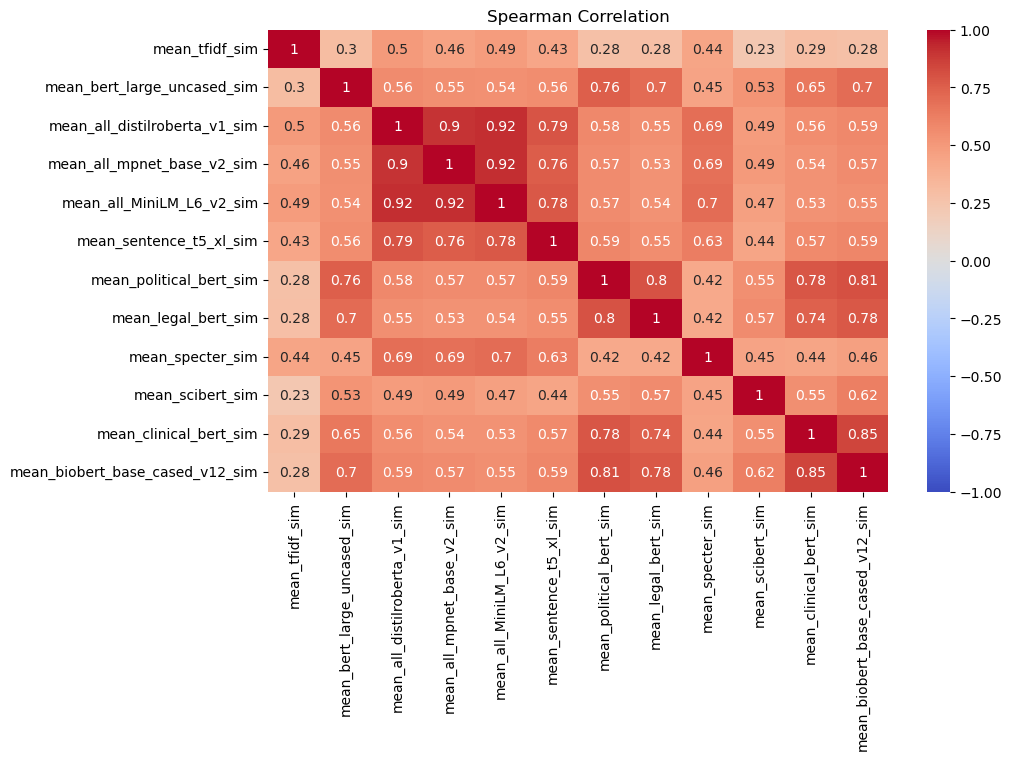

In [69]:
fig = display_corr_pairs(filtered_title_to_title_file[columns[2:]])
# plt.savefig()

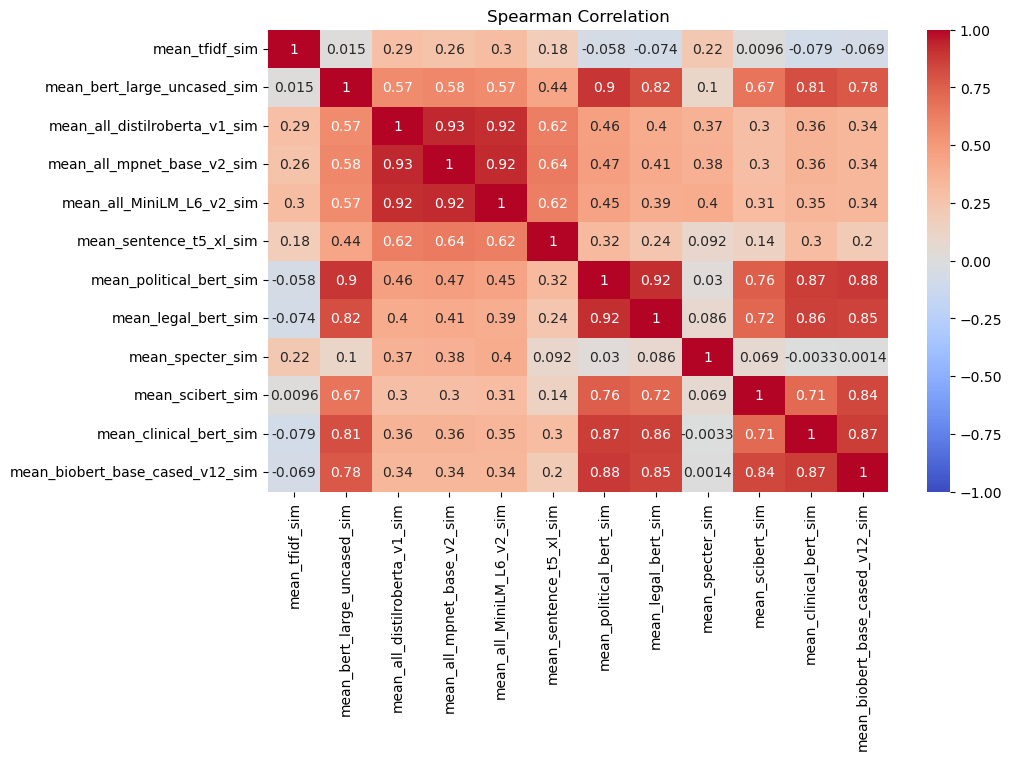

In [70]:
display_corr_pairs(filtered_abstract_to_fulltext_file[columns[2:]])

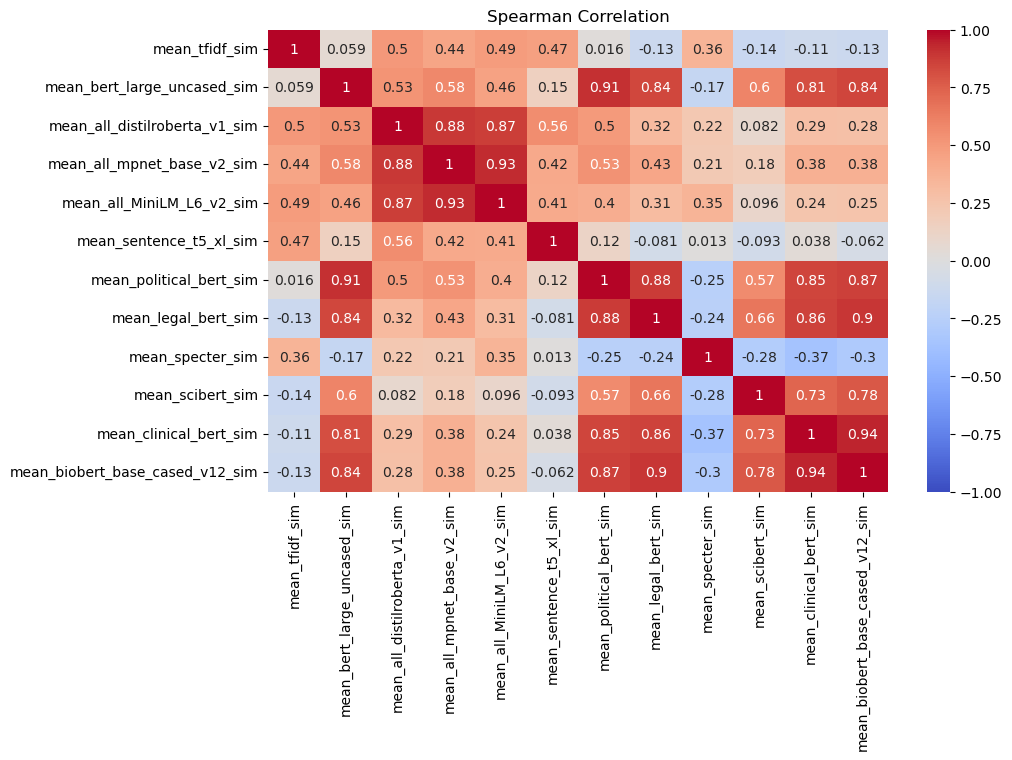

In [71]:
display_corr_pairs(filtered_fulltext_to_fulltext_file[columns[2:]])

In [72]:

print("case 1: \n")
selected_mean_model_sim_score_columns, similar_colms_for_mean_model_sim_score_columns = get_correlated_features(filtered_title_to_title_file,columns[2:])
print("\nselected_mean_model_sim_score_columns :\n",selected_mean_model_sim_score_columns)
for feature in selected_mean_model_sim_score_columns:
    print("\n",feature,":", similar_colms_for_mean_model_sim_score_columns[feature])

print("\n case 2: \n")
selected_mean_model_sim_score_columns, similar_colms_for_mean_model_sim_score_columns = get_correlated_features(filtered_abstract_to_fulltext_file,columns[2:])
print("\nselected_mean_model_sim_score_columns :\n",selected_mean_model_sim_score_columns)
for feature in selected_mean_model_sim_score_columns:
    print("\n",feature,":", similar_colms_for_mean_model_sim_score_columns[feature])


print("\n case 3: \n")
selected_mean_model_sim_score_columns, similar_colms_for_mean_model_sim_score_columns = get_correlated_features(filtered_fulltext_to_fulltext_file,columns[2:])
print("\nselected_mean_model_sim_score_columns :\n",selected_mean_model_sim_score_columns)
for feature in selected_mean_model_sim_score_columns:
    print("\n",feature,":", similar_colms_for_mean_model_sim_score_columns[feature])



case 1: 


selected_mean_model_sim_score_columns :
 ['mean_all_distilroberta_v1_sim', 'mean_tfidf_sim', 'mean_scibert_sim', 'mean_specter_sim', 'mean_bert_large_uncased_sim']

 mean_all_distilroberta_v1_sim : [{'mean_all_mpnet_base_v2_sim': 0.9046090352402365}, {'mean_all_MiniLM_L6_v2_sim': 0.9175876062555227}, {'mean_sentence_t5_xl_sim': 0.7920305731849951}]

 mean_tfidf_sim : []

 mean_scibert_sim : []

 mean_specter_sim : []

 mean_bert_large_uncased_sim : [{'mean_political_bert_sim': 0.7562249777528193}, {'mean_legal_bert_sim': 0.7035578526281203}]

 case 2: 


selected_mean_model_sim_score_columns :
 ['mean_all_distilroberta_v1_sim', 'mean_tfidf_sim', 'mean_sentence_t5_xl_sim', 'mean_specter_sim', 'mean_bert_large_uncased_sim']

 mean_all_distilroberta_v1_sim : [{'mean_all_mpnet_base_v2_sim': 0.9298602672238906}, {'mean_all_MiniLM_L6_v2_sim': 0.9184301682883952}]

 mean_tfidf_sim : []

 mean_sentence_t5_xl_sim : []

 mean_specter_sim : []

 mean_bert_large_uncased_sim : [{'mean_po

### After removing outliers

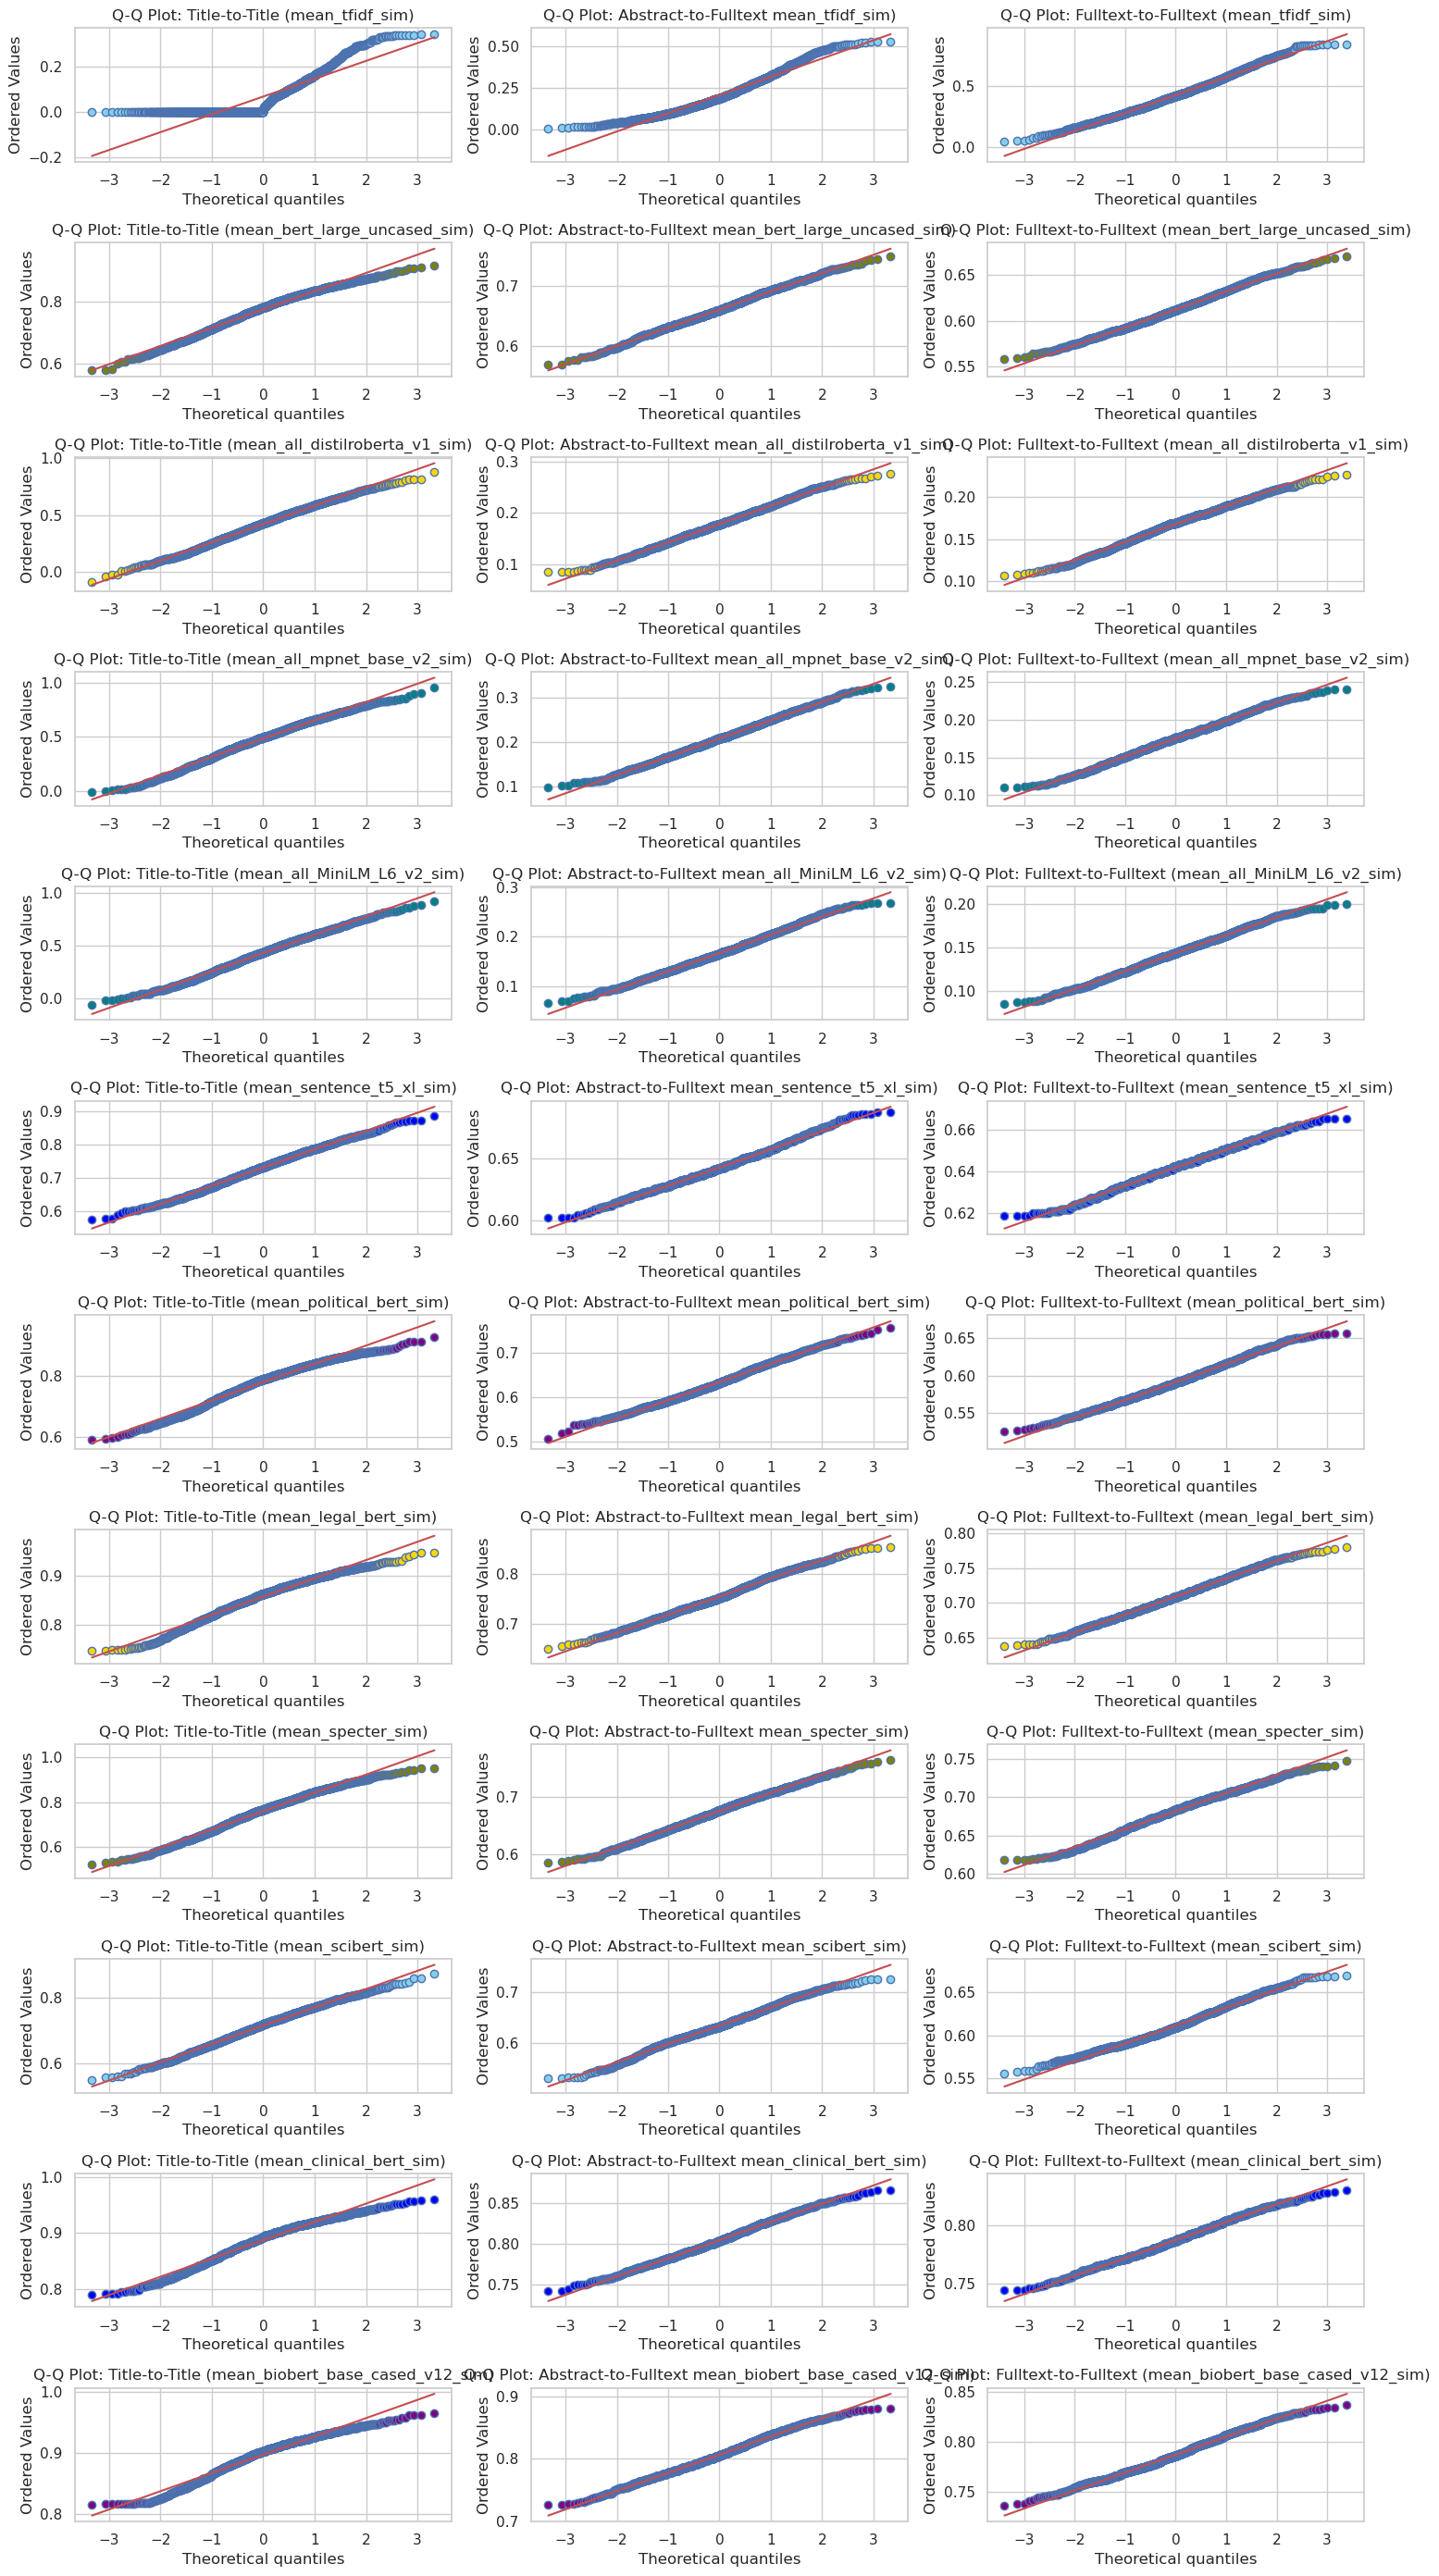

In [38]:
qqplot1(filtered_title_to_title_file, filtered_abstract_to_fulltext_file, filtered_fulltext_to_fulltext_file)